# UMAPs Neurips samples, NK cells

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



In [24]:
#Neurips
adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm_outer.h5ad')

In [25]:
#To find gene names

result = [i for i in adata_neurips.var_names if i.startswith('TC')]
print(result)

['TC2N', 'TCAF1', 'TCAF2', 'TCAIM', 'TCAP', 'TCEA1', 'TCEA2', 'TCEA3', 'TCEAL1', 'TCEAL2', 'TCEAL3', 'TCEAL4', 'TCEAL5', 'TCEAL7', 'TCEAL8', 'TCEAL9', 'TCEANC', 'TCEANC2', 'TCEB1', 'TCEB2', 'TCEB3', 'TCEB3-AS1', 'TCERG1', 'TCF12', 'TCF15', 'TCF19', 'TCF20', 'TCF23', 'TCF25', 'TCF3', 'TCF4', 'TCF4-AS2', 'TCF7', 'TCF7L1', 'TCF7L2', 'TCFL5', 'TCHH', 'TCHP', 'TCIRG1', 'TCL1A', 'TCL1B', 'TCL6', 'TCN2', 'TCOF1', 'TCP1', 'TCP10L', 'TCP11', 'TCP11L1', 'TCP11L2', 'TCTA', 'TCTE1', 'TCTE3', 'TCTEX1D1', 'TCTEX1D2', 'TCTEX1D4', 'TCTN1', 'TCTN2', 'TCTN3']


In [26]:
#Both NK cell types selected

neurips_nk = adata_neurips[(adata_neurips.obs['cell_type'] == "NK") | (adata_neurips.obs['cell_type'] == "NK CD158e1+")]

In [27]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [28]:
neurips_nk_prot=neurips_nk.obsm['protein_expression_clr_neurips']

In [29]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]

In [30]:
samples=adata_neurips.obs['POOL'].unique().tolist()

In [31]:
#selecting one sample from Neurips

eg=adata_neurips[adata_neurips.obs['POOL'] == "s4d1"]


In [32]:
eg

View of AnnData object with n_obs × n_vars = 4885 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [33]:
prot=eg.obsm['protein_expression_clr_neurips']

In [34]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CX3CR1': 'CX3CR1_prot', 'CD226':'CD226_prot', 'TIGIT':'TIGIT_prot', 'CD27':'CD27_prot', 'CD38': 'CD38_prot', 'CD224': 'CD224_prot', 'CD7': 'CD7_prot', 'CD44': 'CD44_prot', 'CD34': 'CD34_prot','CD5': 'CD5_prot'})


In [35]:
#adding protein information to obs

a = eg.obs
b = prot

adata_eg=pd.concat([a, b], axis=1)
eg.obs=adata_eg


In [36]:
#selecting NK cells, gd T cells and ILCs

sample_nk = eg[(eg.obs['cell_type'] == "NK") | (eg.obs['cell_type'] == "NK CD158e1+") | (eg.obs['cell_type'] == "ILC") | (eg.obs['cell_type'] == "gdT CD158b+")]   


In [37]:
#Computing a neighborhood of observations using latent space

sc.pp.neighbors(adata_neurips, use_rep="X_totalVI")   #indicated representation

sc.tl.umap(adata_neurips)

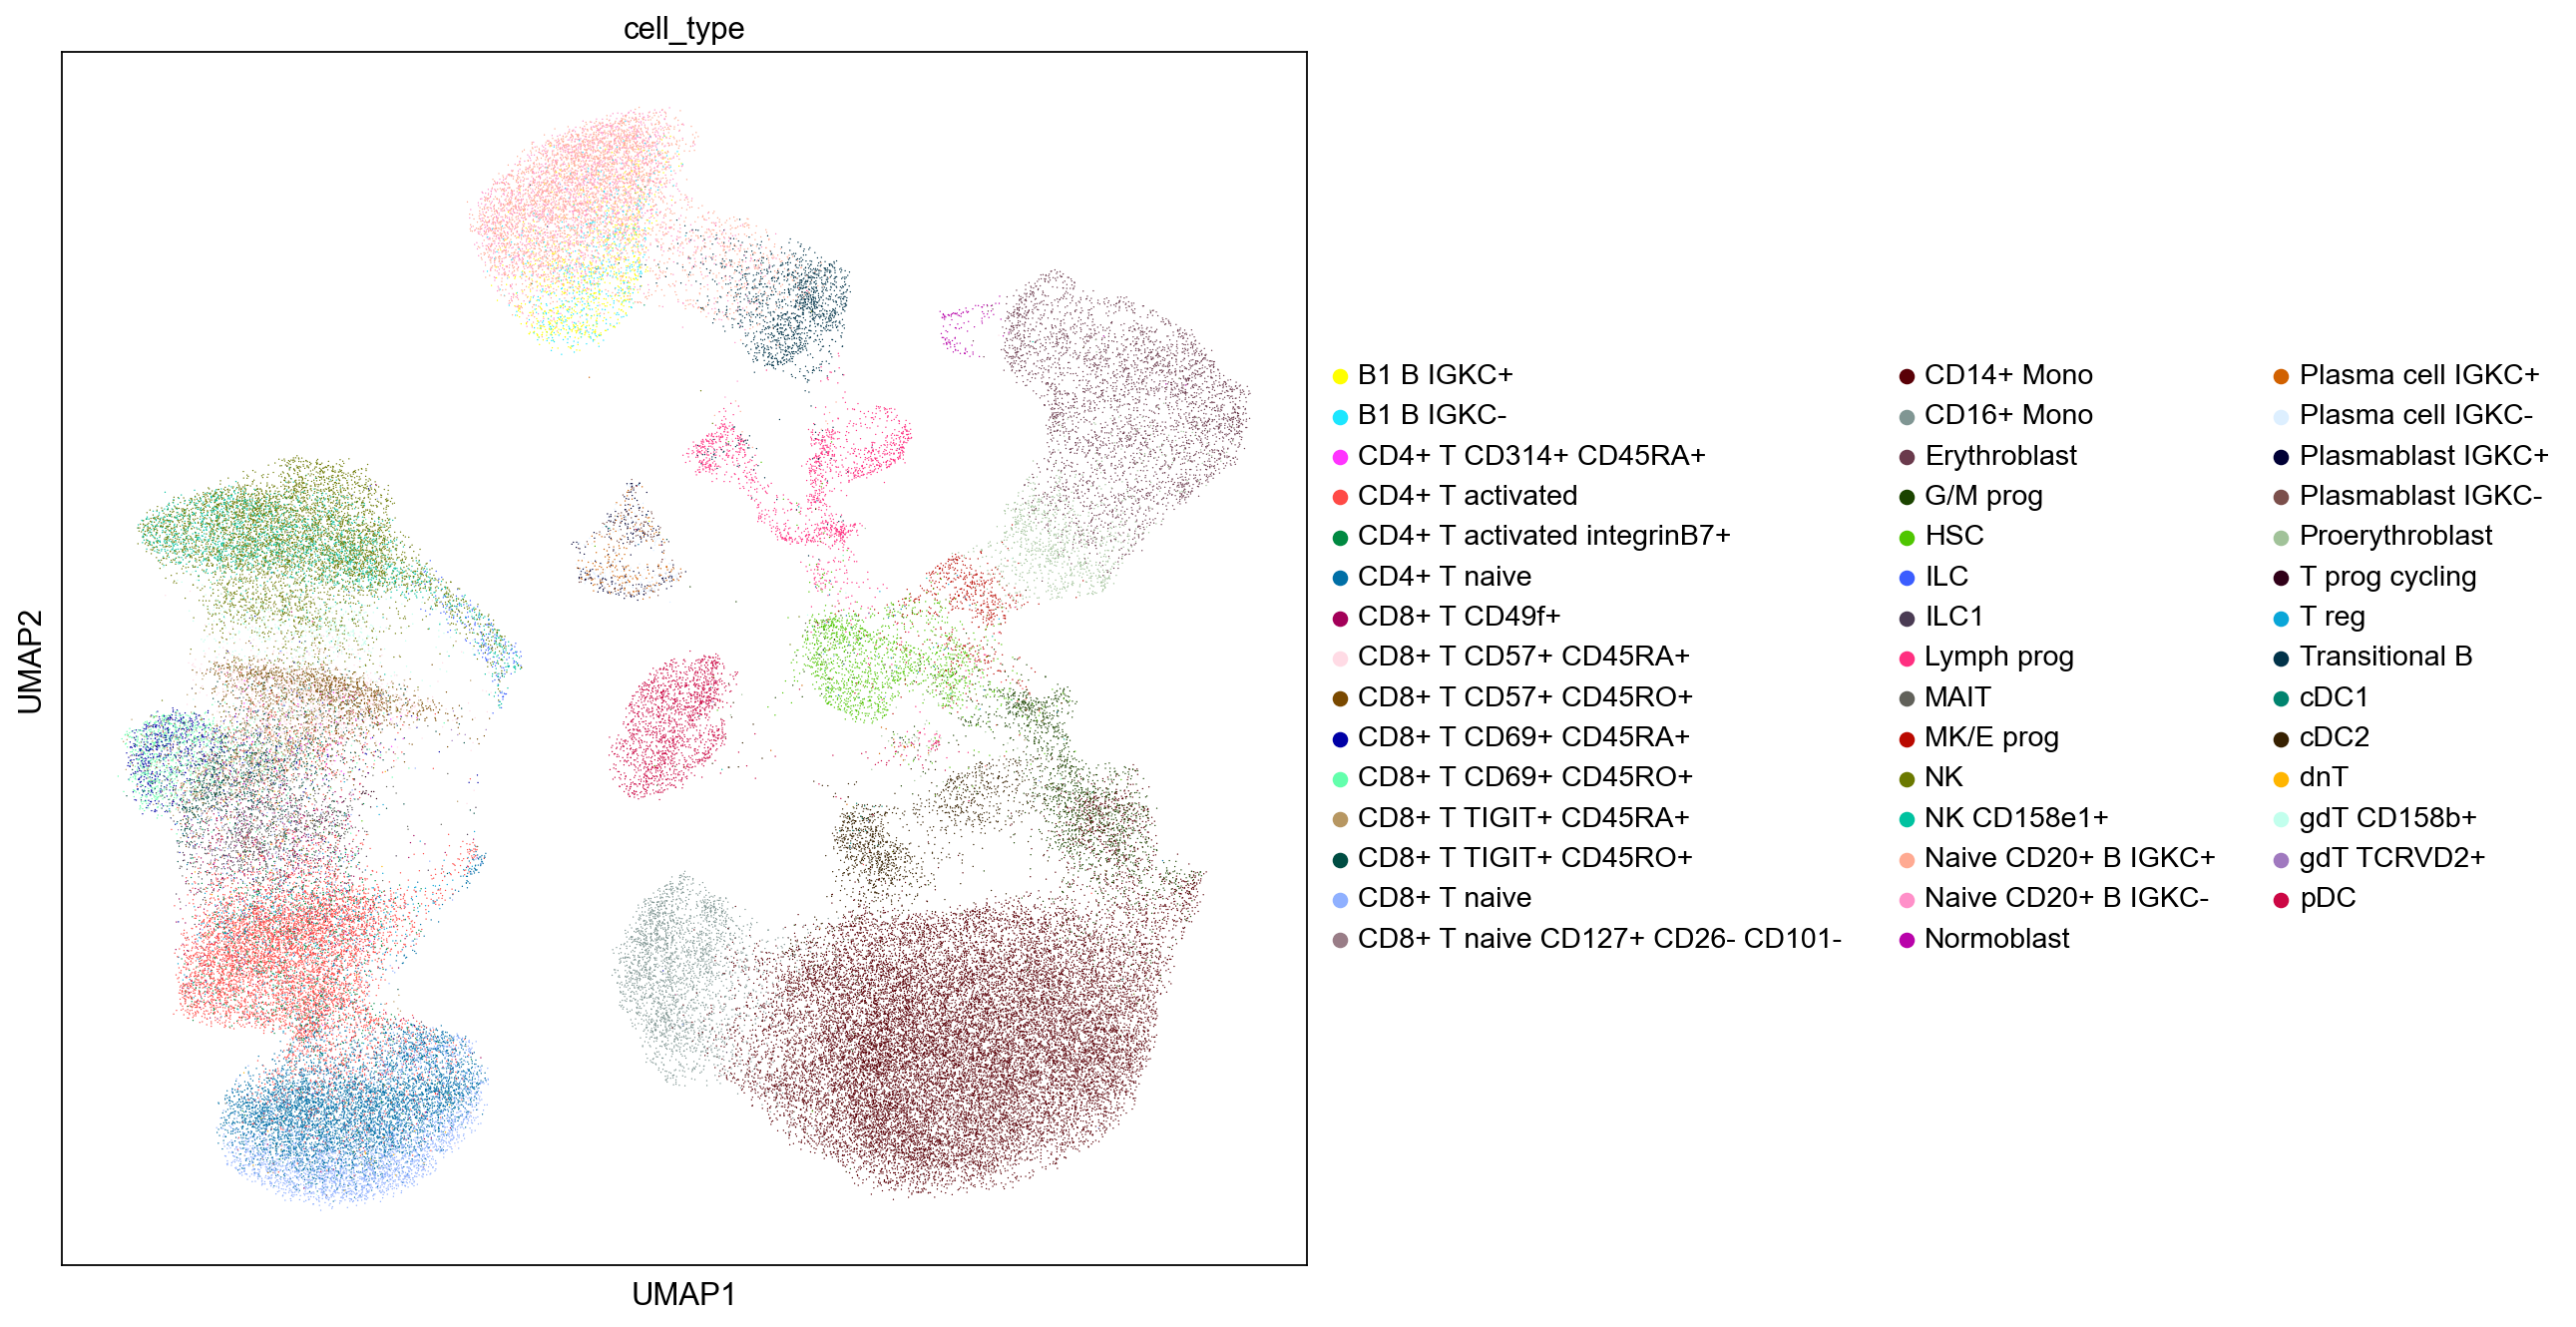

In [38]:
#Whole Neurips dataset plotted

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(adata_neurips, color = ['cell_type'], color_map = 'viridis')

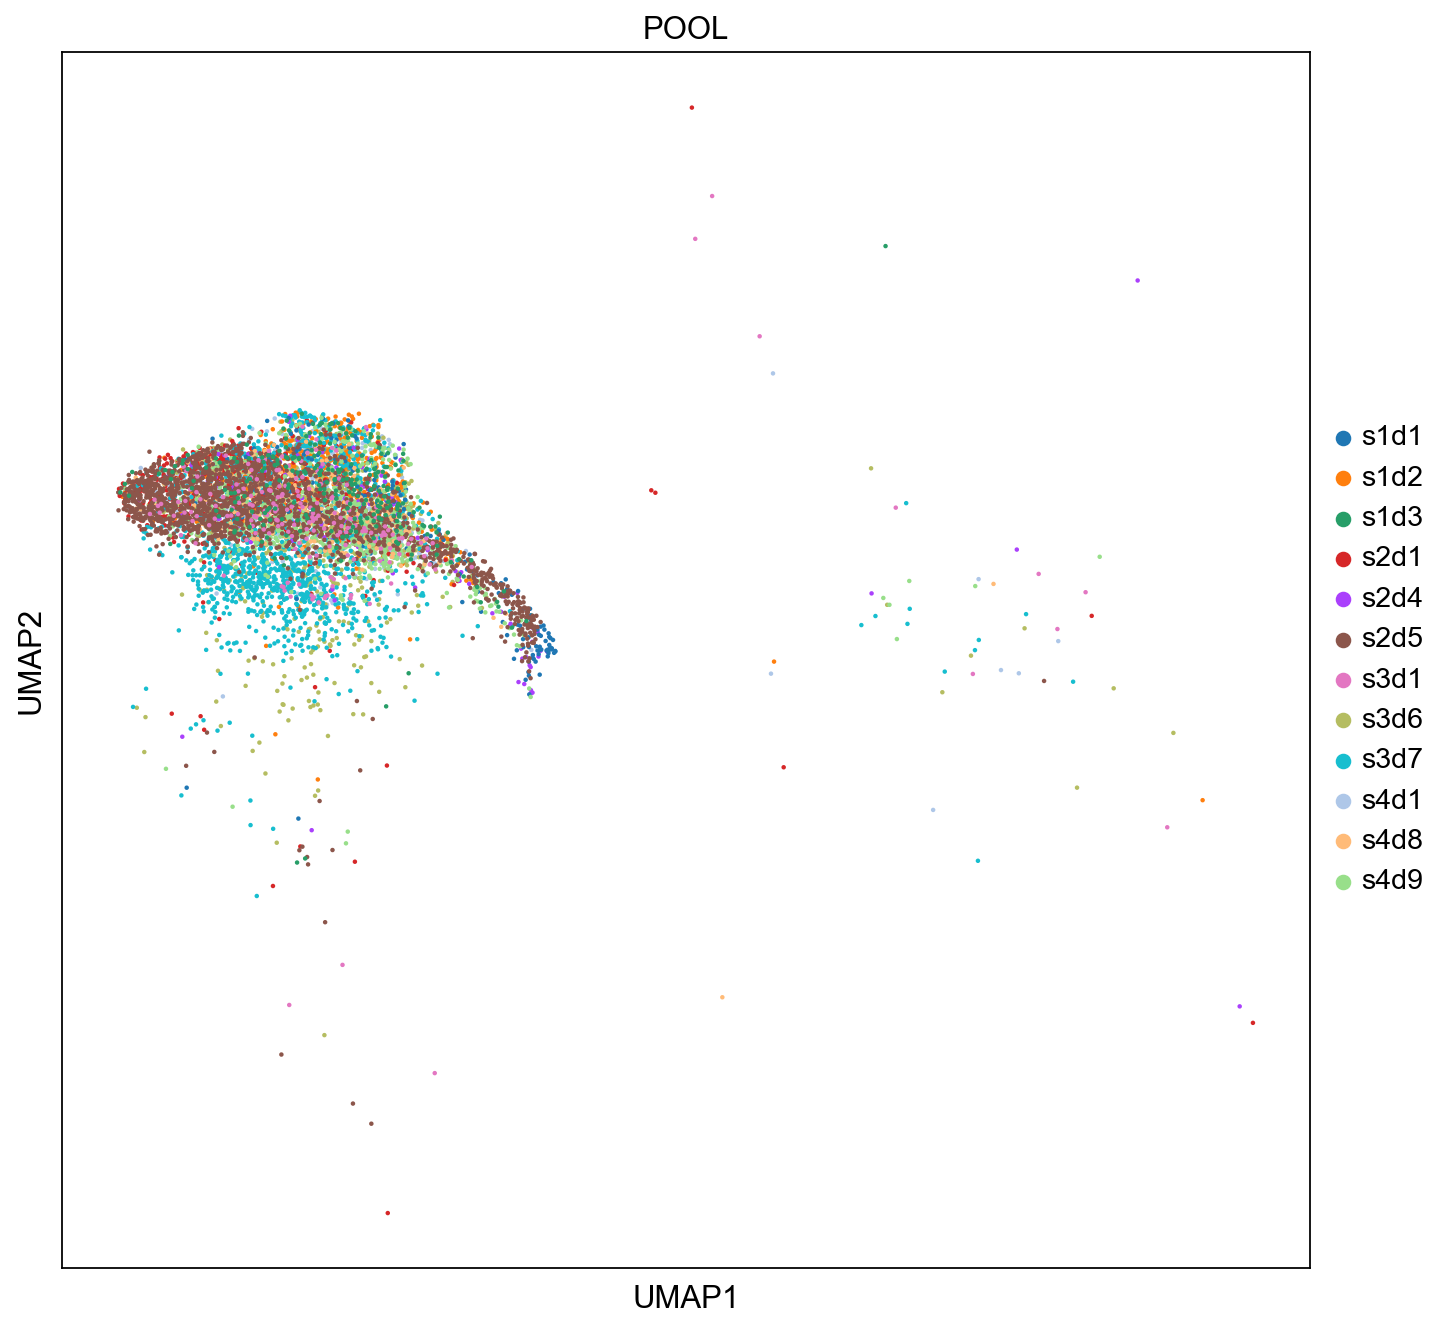

In [39]:
# NK cells from Neurips dataset, coloured by samples

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(neurips_nk, color = ['POOL'])

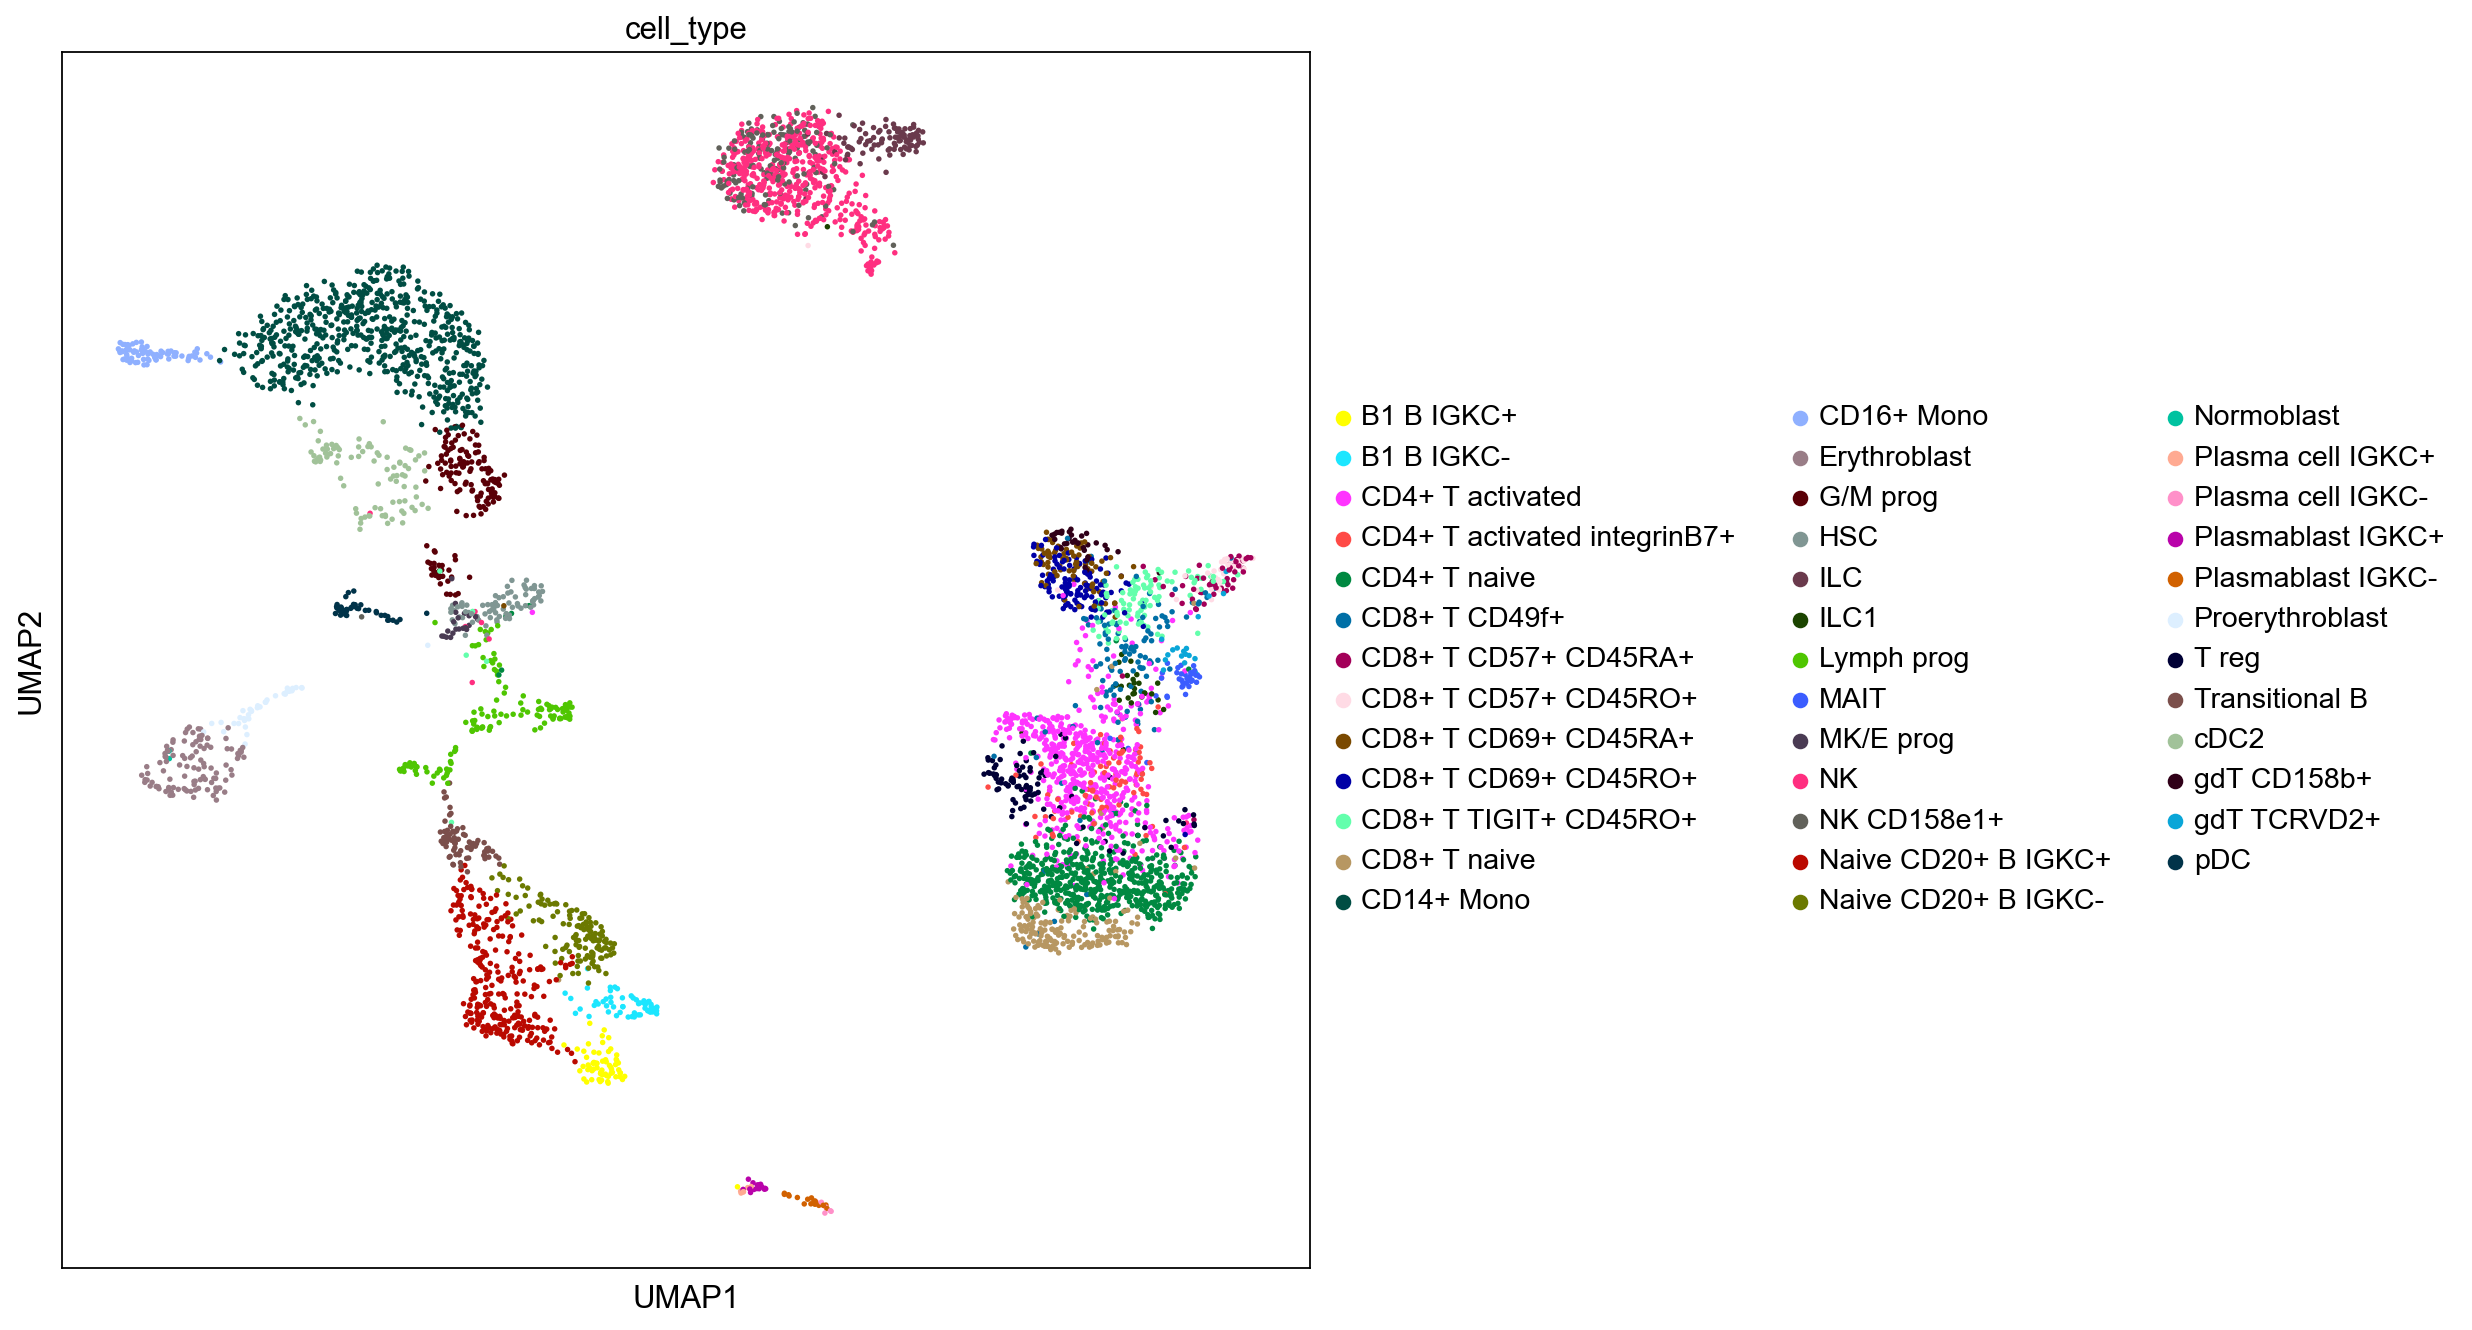

In [40]:
#Only selected sample

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

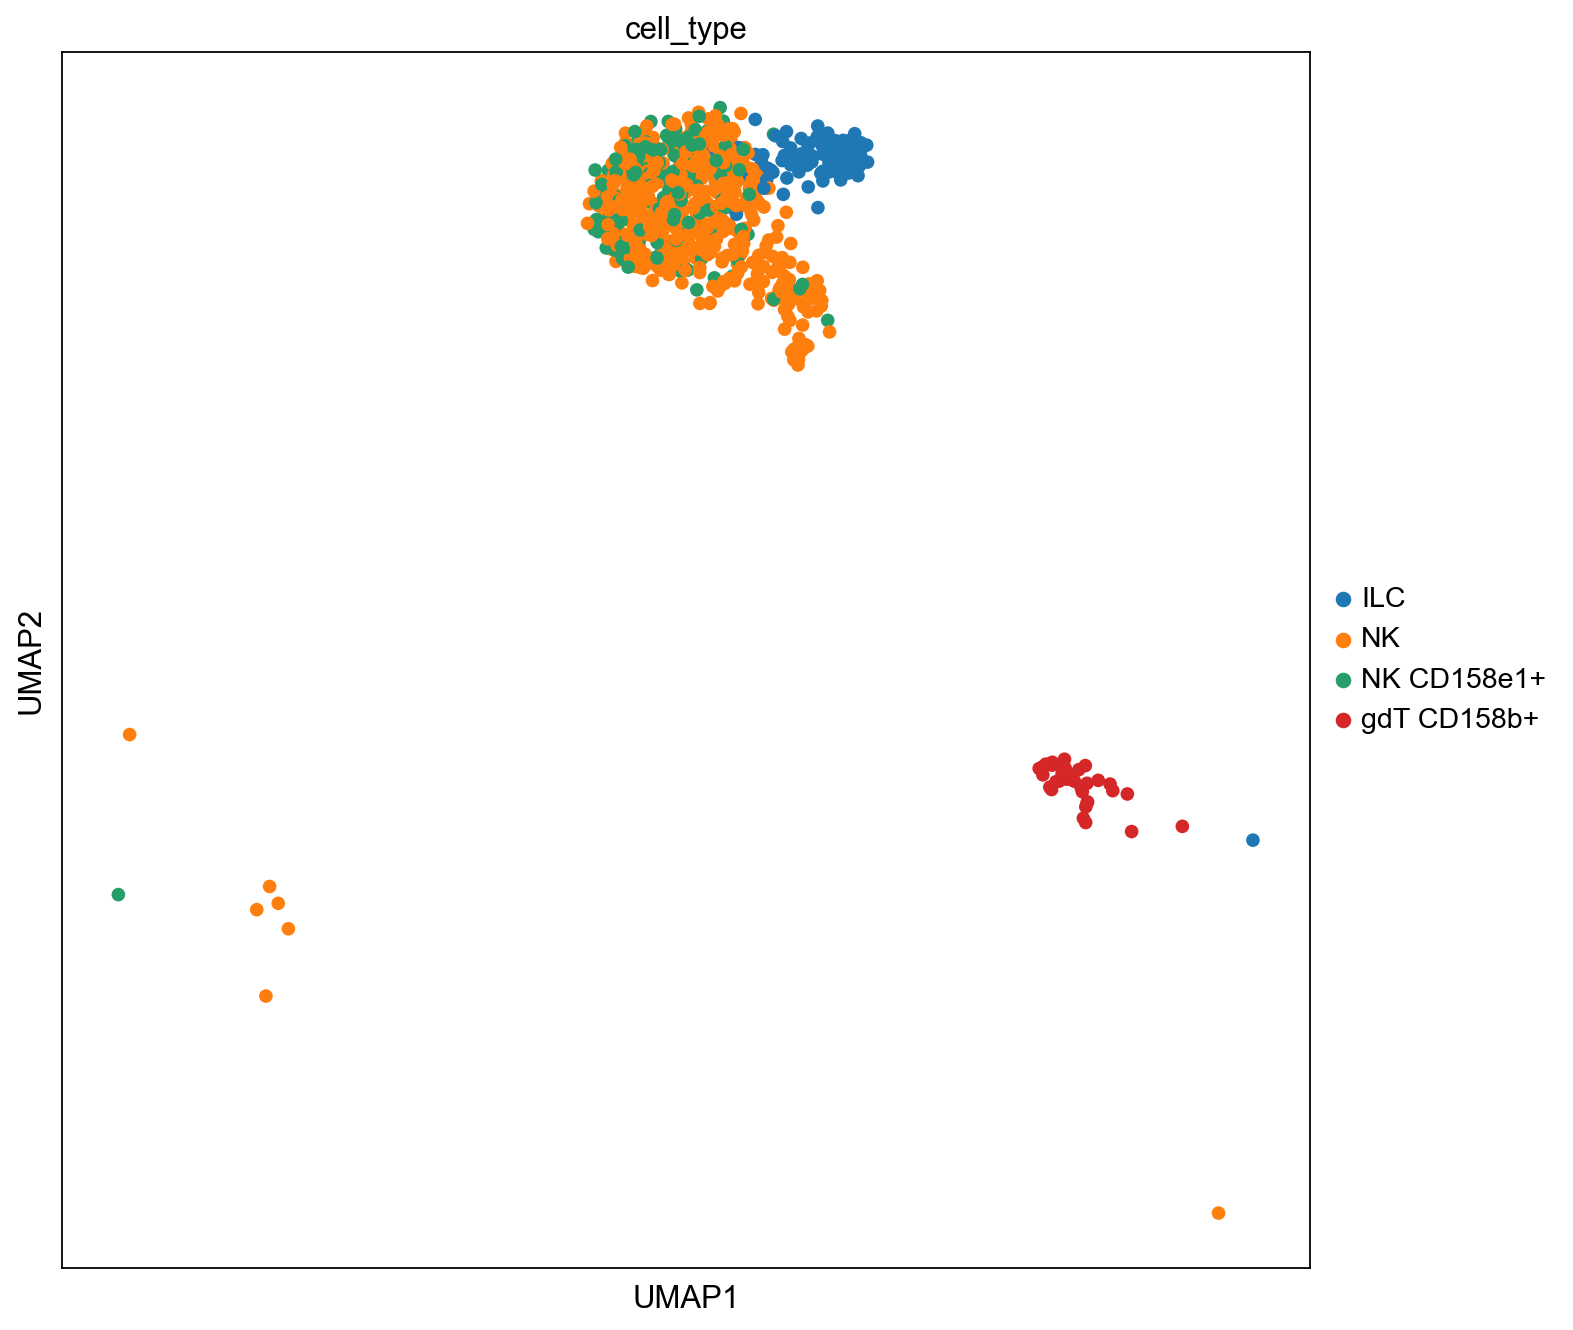

In [41]:
#NK, gd T cells and ILCs from selected sample

sc.pl.umap(sample_nk, color = ['cell_type'], color_map = 'viridis')

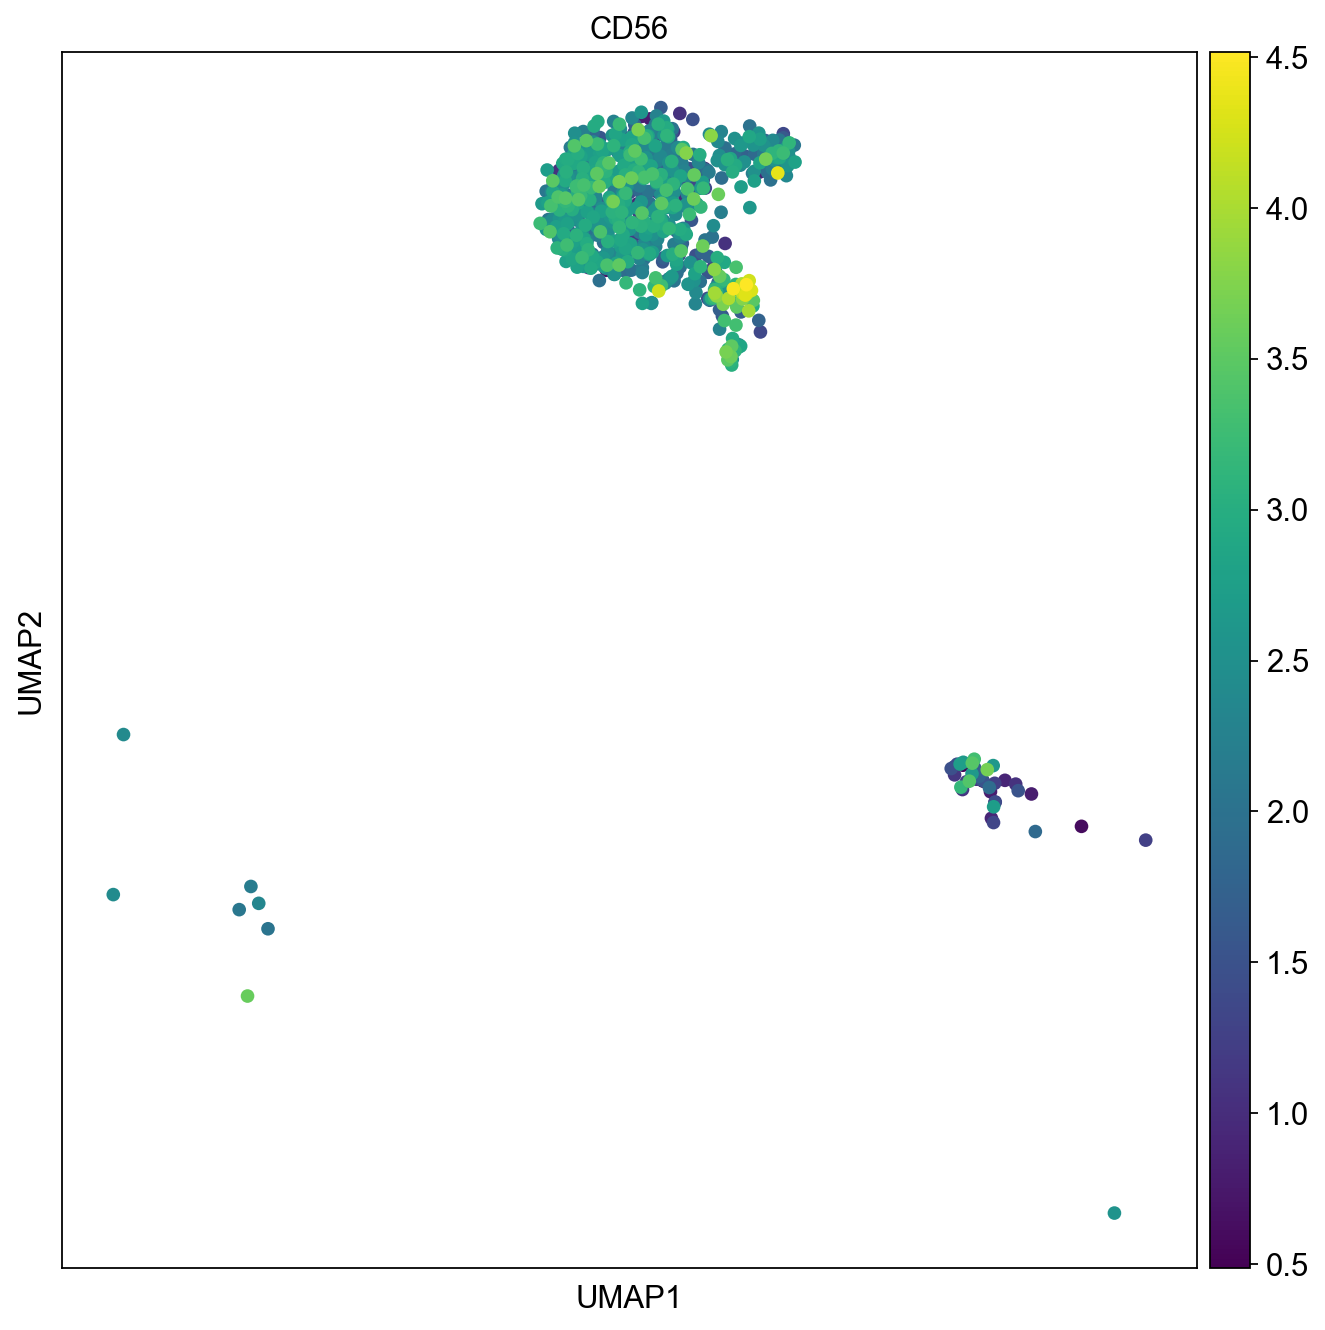

In [22]:
sc.pl.umap(sample_nk, color = ["CD56"], layer = 'protein_expression_clr_neurips')

## Clustering based on CLR transformed protein data

In [50]:
adata_neurips

AnnData object with n_obs × n_vars = 80998 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    uns: 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'
 

In [42]:
#Computing a neighborhood of observations using CLR transformed protein data

sc.pp.neighbors(adata_neurips, use_rep="protein_expression_clr_neurips") 

sc.tl.umap(adata_neurips)

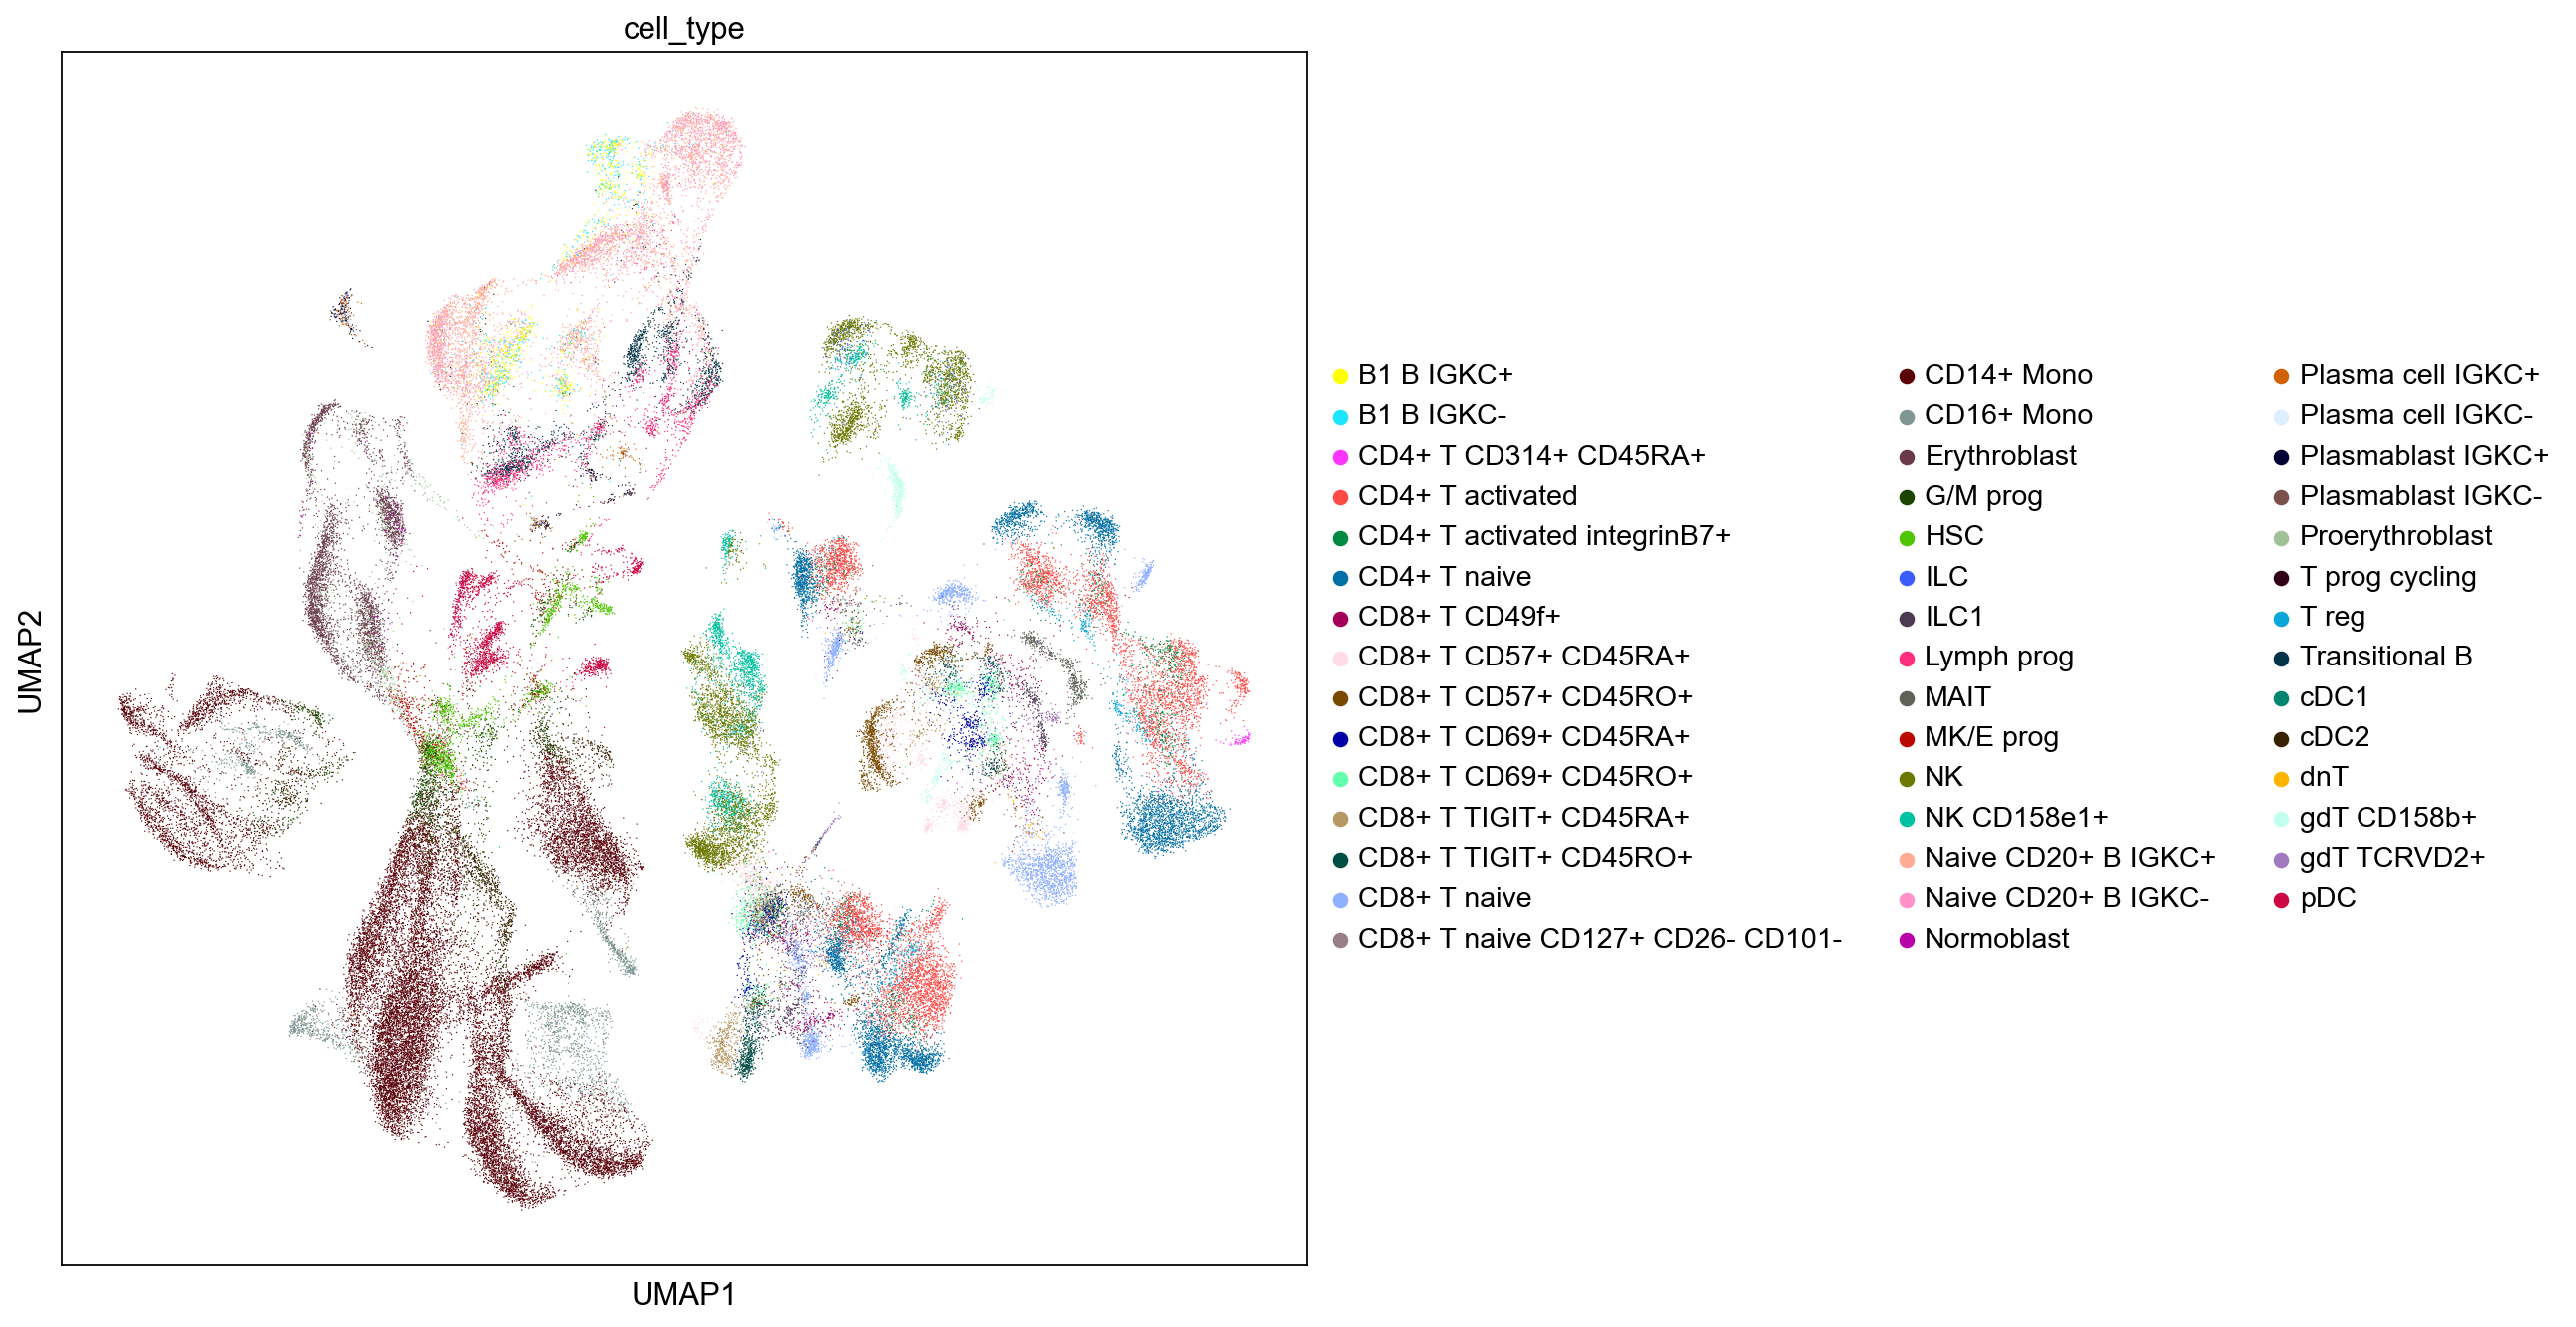

In [43]:
sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(adata_neurips, color = ['cell_type'], color_map = 'viridis')

In [51]:
sc.pp.neighbors(adata_neurips, use_rep="protein_expression_clr_neurips") 

sc.tl.umap(adata_neurips)

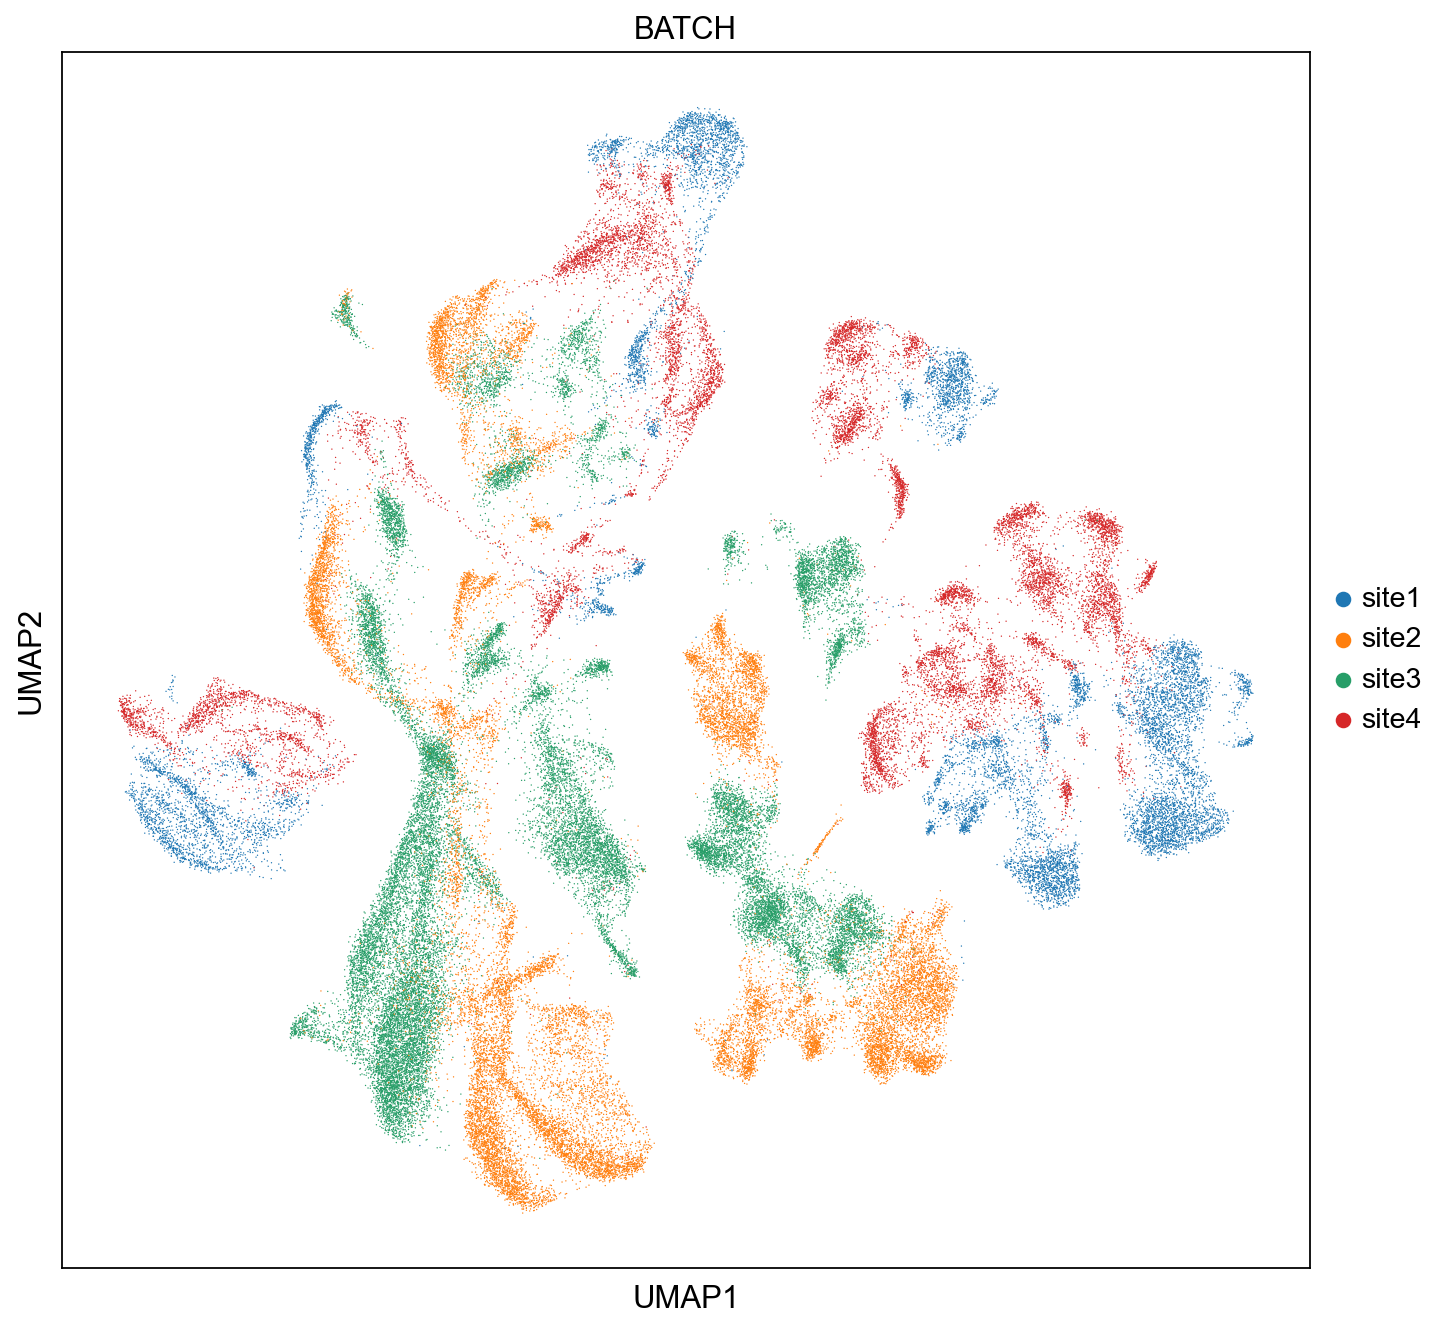

In [52]:
sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(adata_neurips, color = ['BATCH'], color_map = 'viridis')

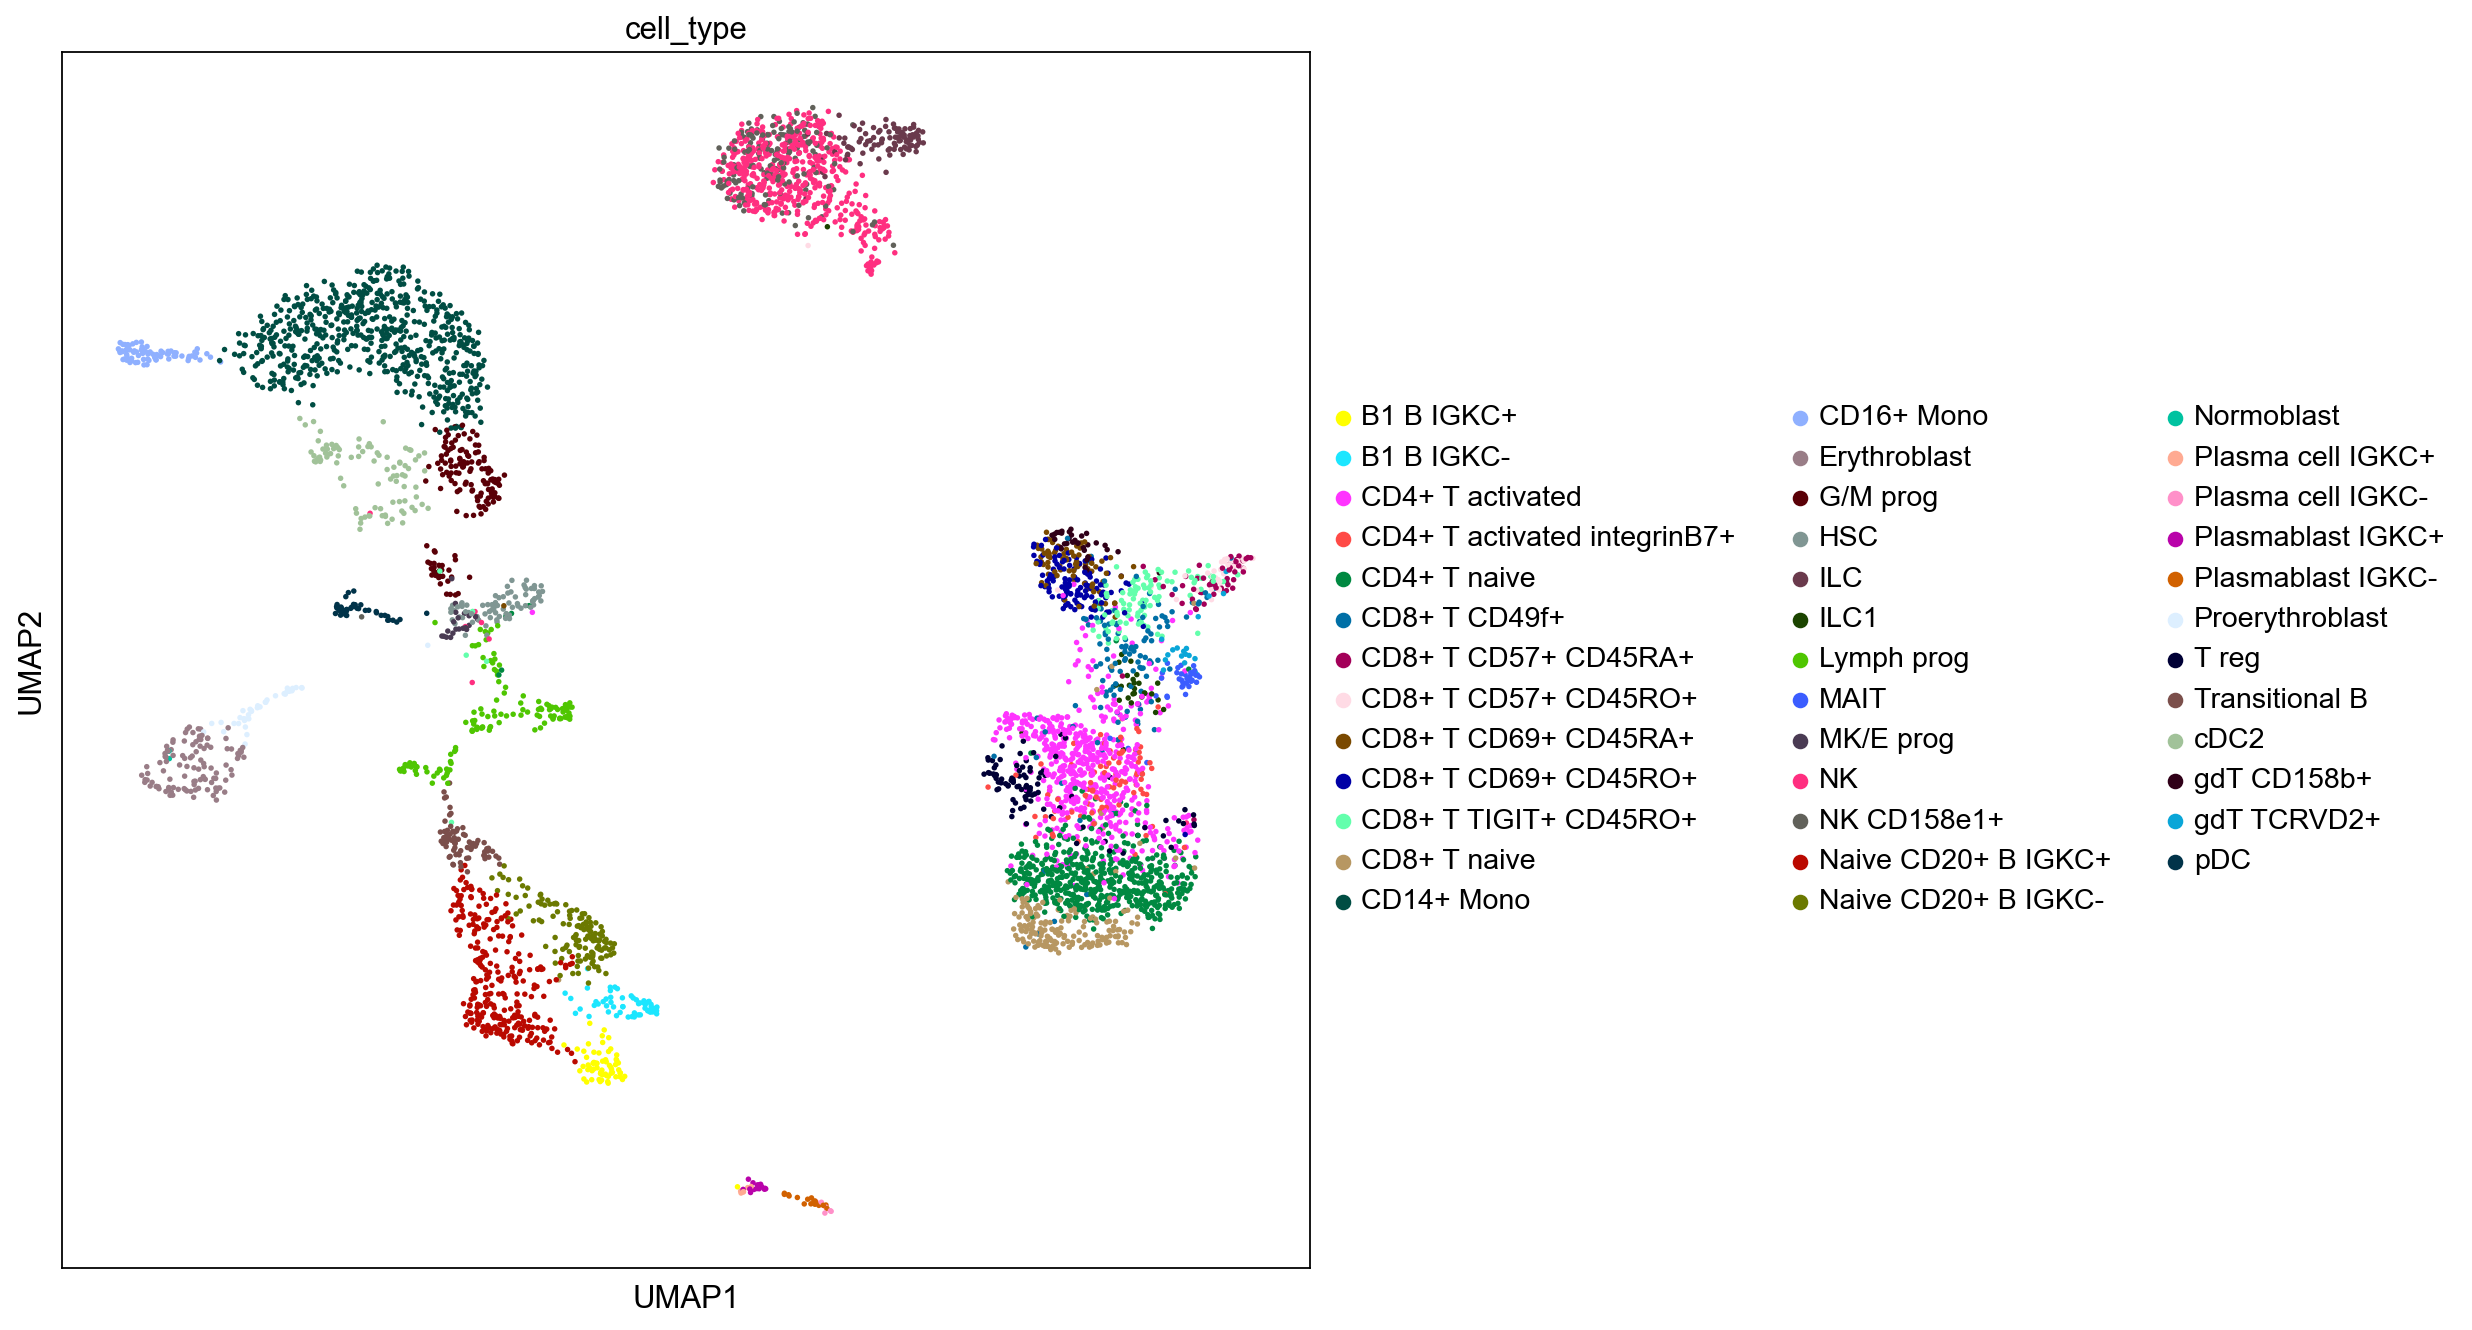

In [44]:
#Only selected sample

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

In [45]:
sc.pp.neighbors(eg, use_rep="protein_expression_clr_neurips") 

sc.tl.umap(eg)

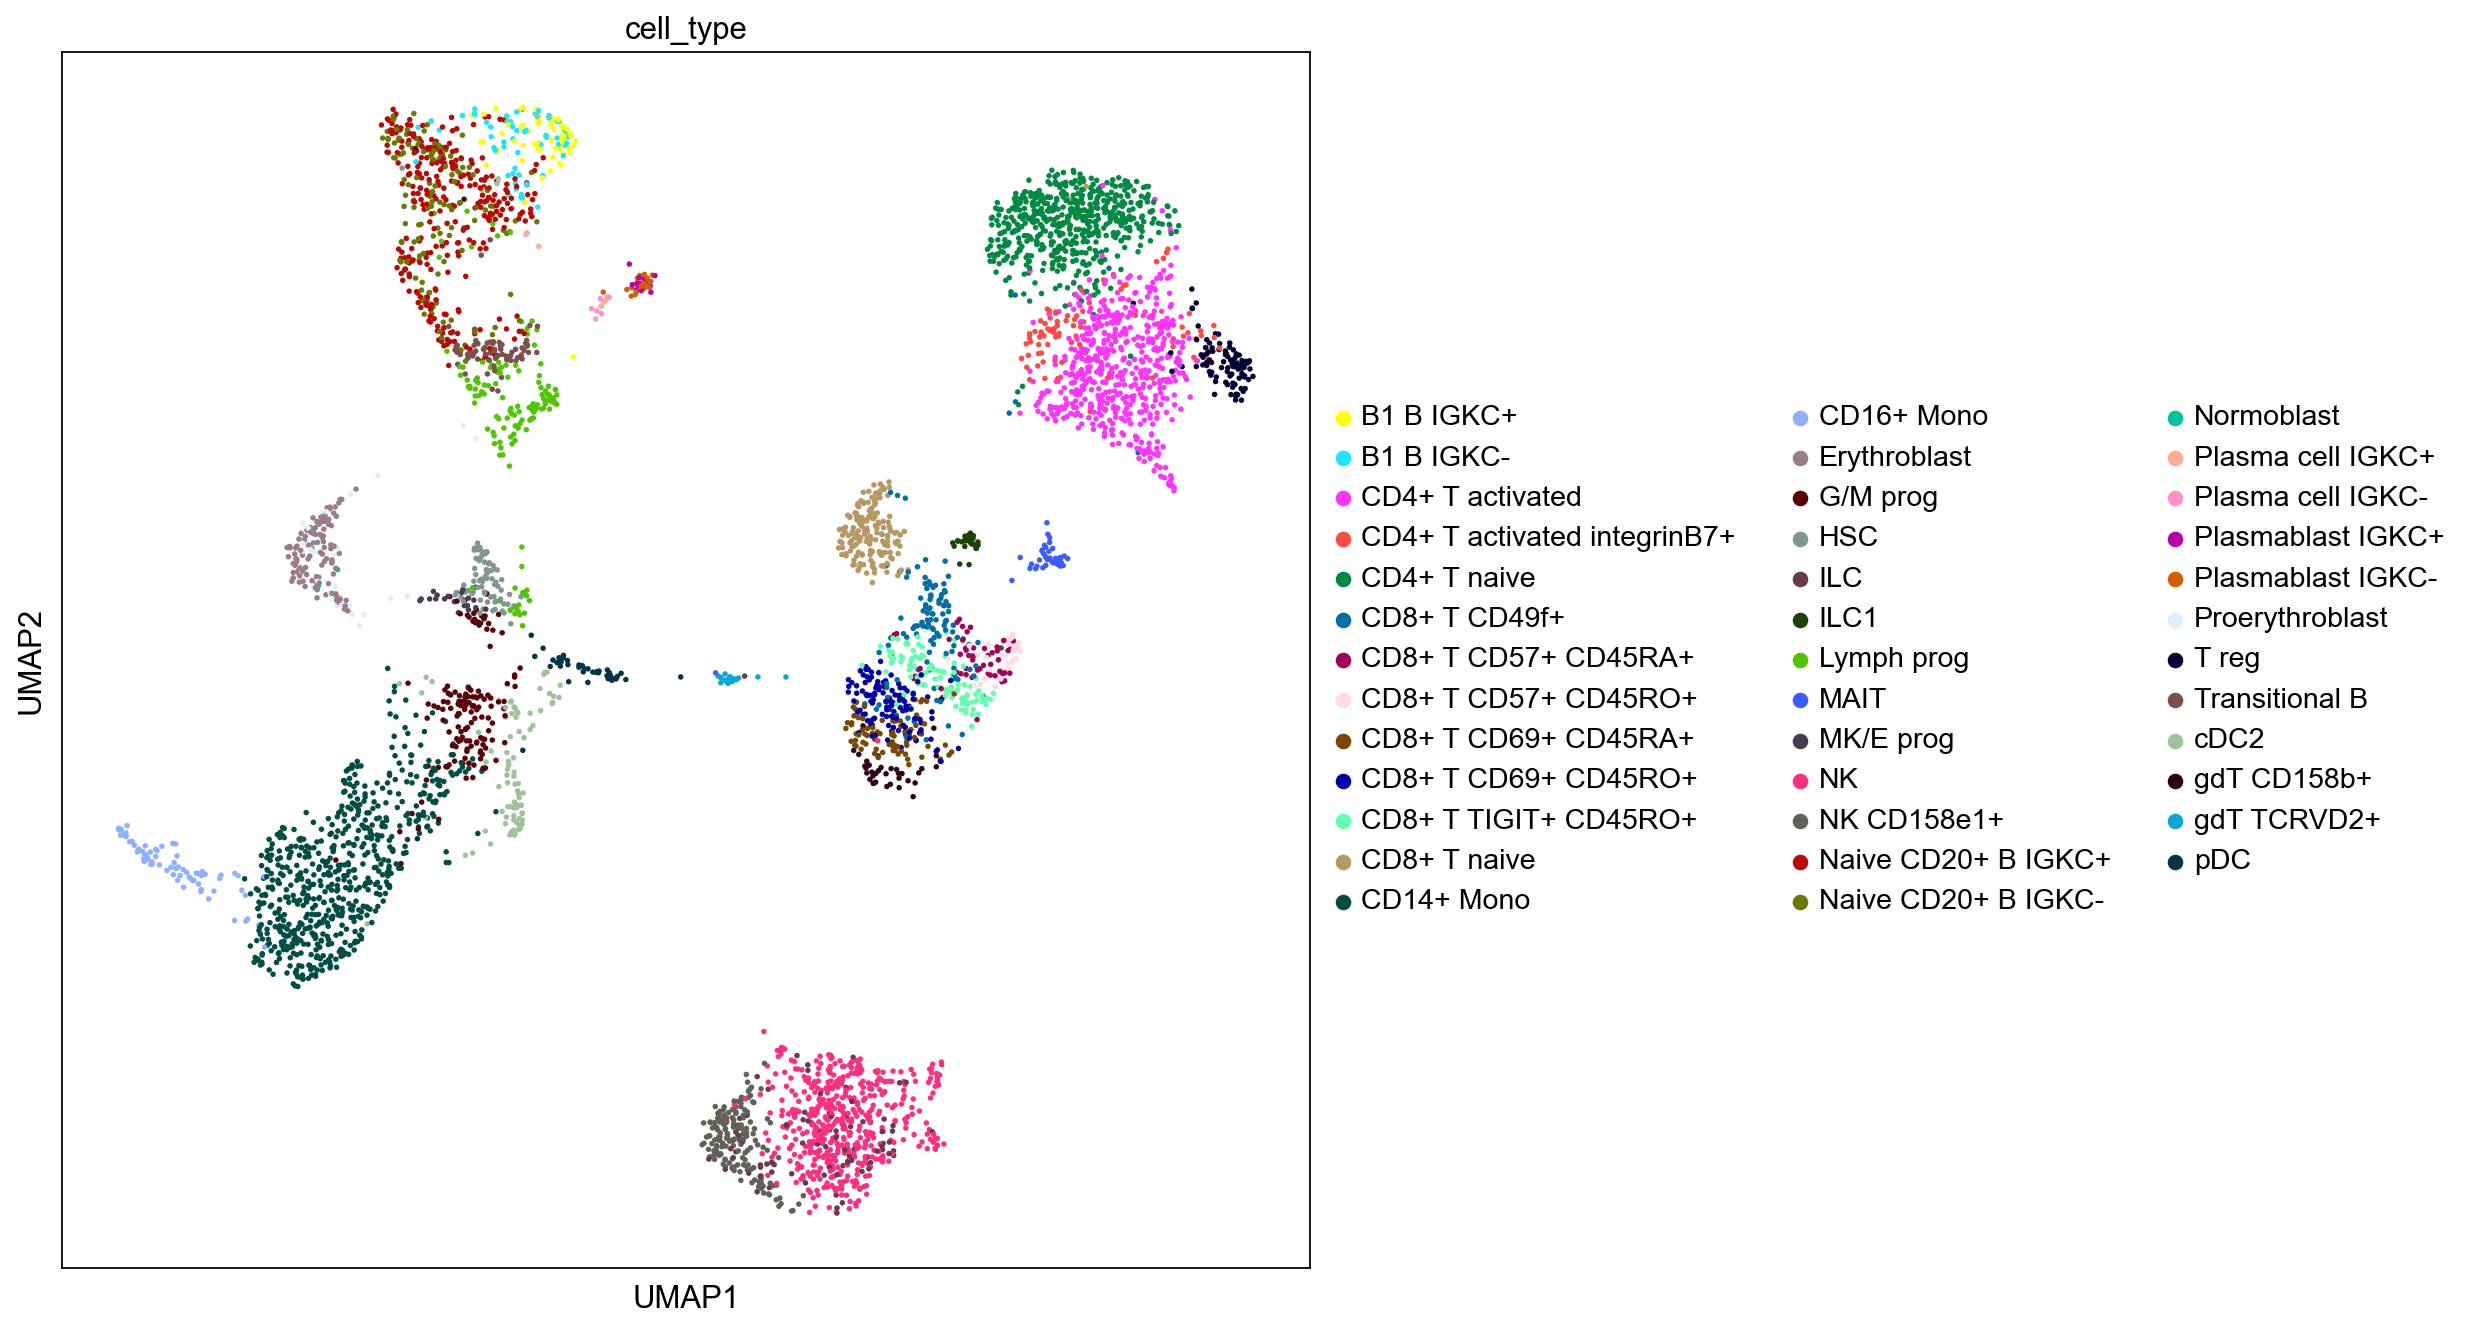

In [46]:
sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

In [48]:
sc.pp.neighbors(sample_nk, use_rep="protein_expression_clr_neurips") 

sc.tl.umap(sample_nk)

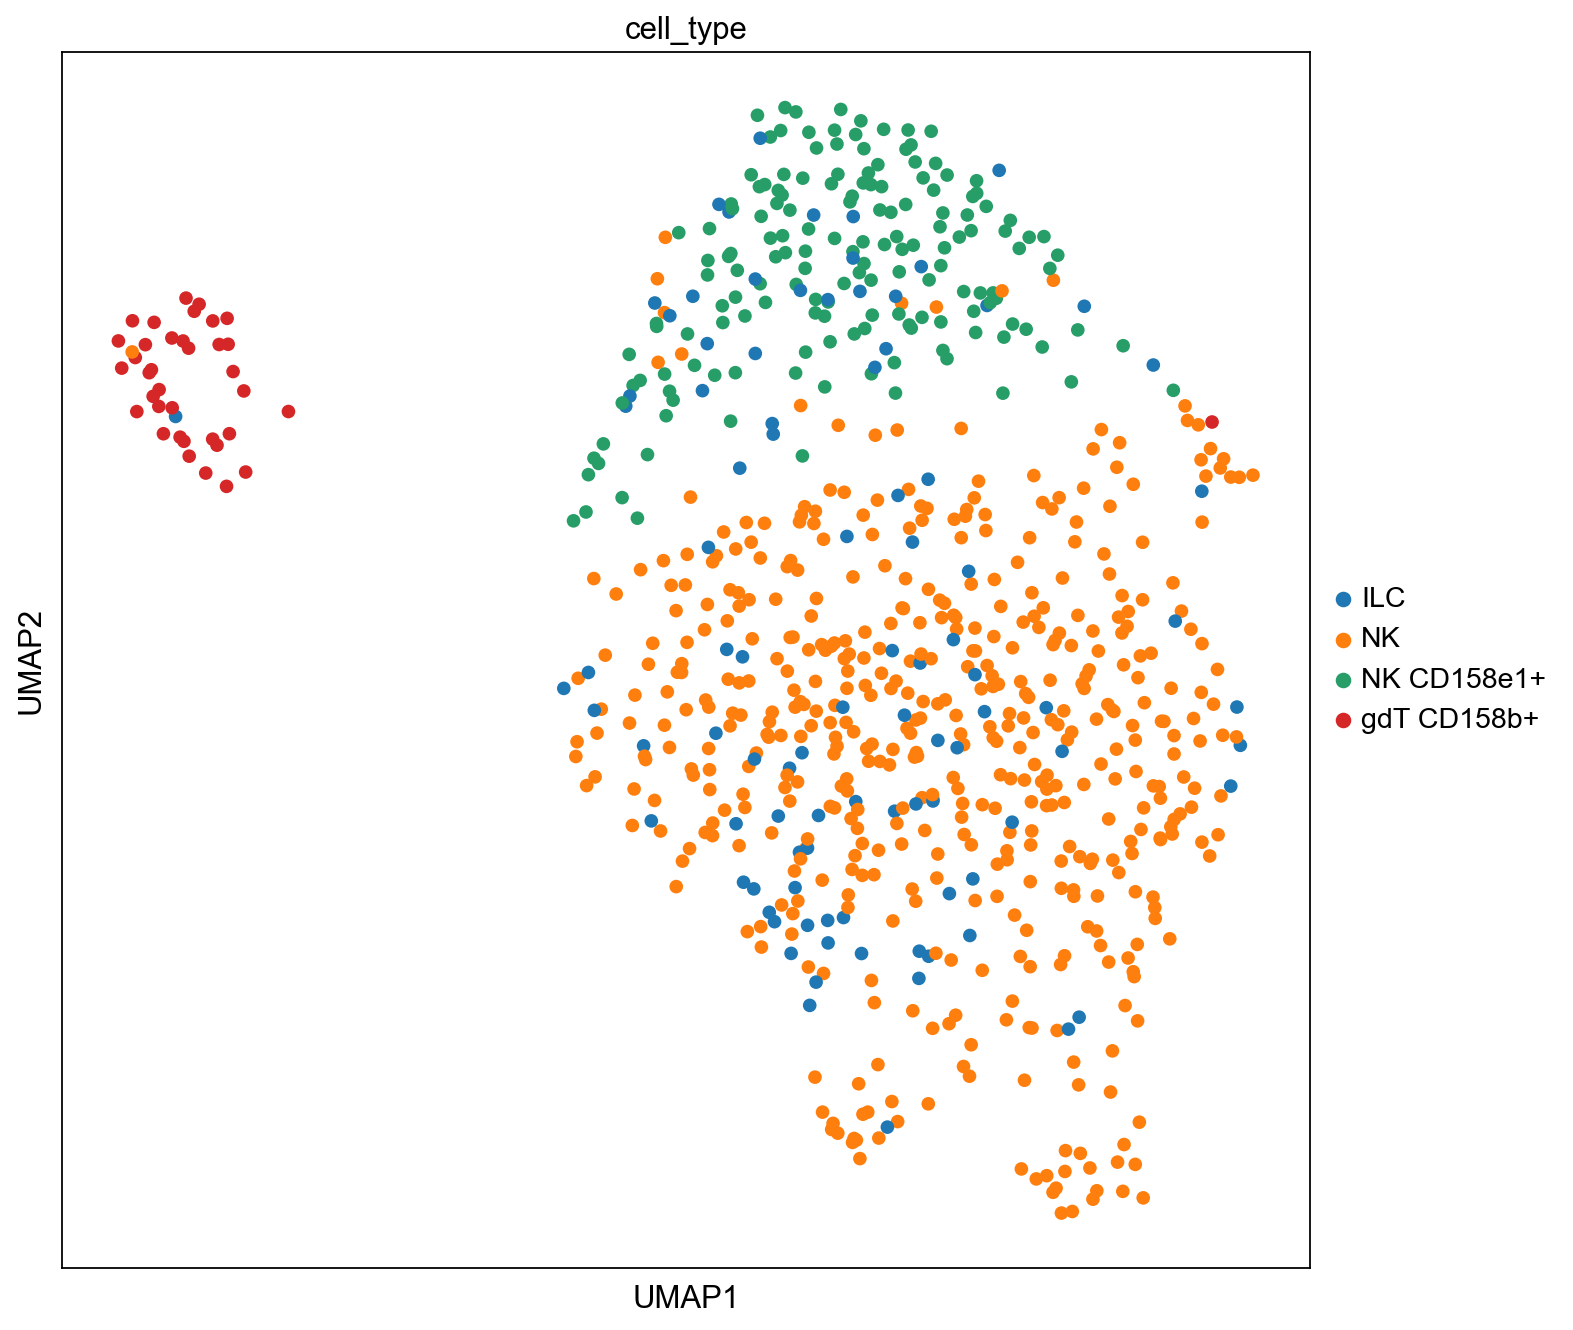

In [49]:
sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(sample_nk, color = ['cell_type'], color_map = 'viridis')

In [56]:
adata_neurips

AnnData object with n_obs × n_vars = 80998 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    uns: 'neighbors', 'umap', 'cell_type_colors', 'BATCH_colors'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    la

## Clustering based on RNA

In [80]:
adata_neurips.X

<80998x21720 sparse matrix of type '<class 'numpy.float32'>'
	with 120280821 stored elements in Compressed Sparse Row format>

In [68]:
rna

<80998x21720 sparse matrix of type '<class 'numpy.float32'>'
	with 120280821 stored elements in Compressed Sparse Row format>

In [64]:
#adding protein information to obs

a = adata_neurips.obsm
b = rna

adata_eg =pd.concat([a, b], axis=1)
adata_neurips.obsm=adata_eg

TypeError: cannot concatenate object of type '<class 'anndata._core.aligned_mapping.AxisArrays'>'; only Series and DataFrame objs are valid

In [59]:
adata_neurips.obsm['X_umap']

array([[ 9.953288 , 13.35785  ],
       [13.47736  ,  4.4938517],
       [ 9.494899 , 12.32469  ],
       ...,
       [15.702052 ,  0.3709162],
       [12.276241 ,  1.887318 ],
       [15.519212 ,  0.5608329]], dtype=float32)

In [60]:
sc.pp.neighbors(adata_neurips, use_rep="X_umap") 

sc.tl.umap(adata_neurips)

In [62]:
sc.pl.umap(X_umap)

NameError: name 'X_umap' is not defined